In [17]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

In [18]:
class equationState(TypedDict):
    a:int
    b:int
    c:int
    
    equation:str
    discriminant :float
    res:str

In [19]:
def show_equation(state:equationState):
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']}"
    return {'equation':equation}

In [20]:
def discriminant_finder(state:equationState):
    discriminant = (state['b']**2)-(4*state['a']*state['c'])
    return {'discriminant':discriminant}

In [21]:
def real_roots(state:equationState):
    x1 = (-state['b'] + (state['discriminant'])**0.5)/(2*state['a'])
    x2 = (-state['b'] - (state['discriminant'])**0.5)/(2*state['a'])
    res =f"The roots are real , and they are {x1} and {x2}"
    return {'res':res}

def imaginary_roots(state:equationState):
    res =f"The roots are imaginary like your gf"
    return {'res':res}

def real_equal_roots(state:equationState):
    x1 = (-state['b'] + (state['discriminant'])**0.5)/(2*state['a'])
    res =f"The roots are real and equal , and they are {x1}"
    return {'res':res}

In [22]:
def check_discriminant(state:equationState)->Literal['Discriminanant_positive','Discriminanant_negative','Discriminanant_zero']:
    if state['discriminant']>0:
        return "Discriminanant_positive"
    elif state['discriminant']<0:
        return "Discriminanant_negative"
    else:
        return "Discriminanant_zero"

In [23]:
graph=StateGraph(equationState)

graph.add_node('Show_equation',show_equation)
graph.add_node('Calculate_Discriminant',discriminant_finder)
graph.add_node('Discriminanant_positive',real_roots)
graph.add_node('Discriminanant_negative',imaginary_roots)
graph.add_node('Discriminanant_zero',real_equal_roots)

graph.add_edge(START,'Show_equation')
graph.add_edge('Show_equation','Calculate_Discriminant')

graph.add_conditional_edges('Calculate_Discriminant',check_discriminant)

graph.add_edge('Discriminanant_positive',END)
graph.add_edge('Discriminanant_negative',END)
graph.add_edge('Discriminanant_zero',END)

workflow = graph.compile()

In [24]:
initial_state = {
    'a':4,
    'b':-5,
    'c': -4
}

final_state = workflow.invoke(initial_state)

In [25]:
final_state

{'a': 4,
 'b': -5,
 'c': -4,
 'equation': '4x^2 + -5x + -4',
 'discriminant': 89,
 'res': 'The roots are real , and they are 1.8042476415070754 and -0.5542476415070754'}

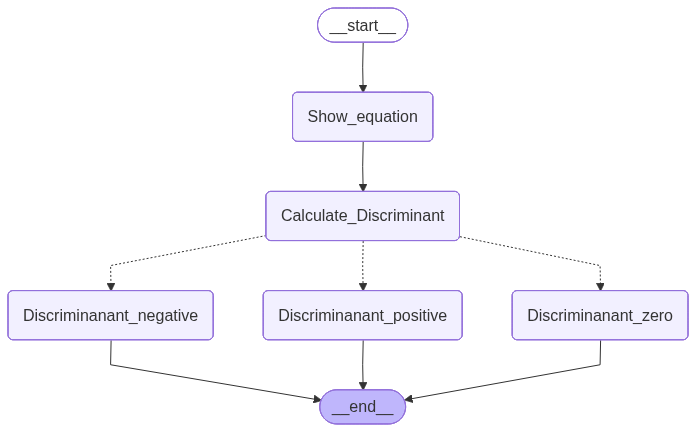

In [26]:
workflow

In [15]:
from IPython.display import Image
print(workflow.get_graph().draw_ascii())

                                            +-----------+                                            
                                            | __start__ |                                            
                                            +-----------+                                            
                                                  *                                                  
                                                  *                                                  
                                                  *                                                  
                                          +---------------+                                          
                                          | Show_equation |                                          
                                          +---------------+                                          
                                                  *                               